In [2]:
# Importing nrcessary liberaries

import pandas as pd
import numpy as np
import os
import seaborn as sns
import plotly.express as px
from matplotlib import pyplot as plt

In [3]:
# Read the anonymised filltered excel file
AirShipments_DK = pd.read_excel (r"C:\Users\emana\Documents\My Graduation project-DA-Redi\cost_air_shipments.xlsx")

In [13]:
def format_currency(value):
    # Split the integer and decimal parts
    integer_part, decimal_part = f"{value:,.2f}".split('.')
    
    # Replace commas with periods and periods with commas in the integer part
    formatted_integer_part = integer_part.replace(',', '.')
    
    # Combine the formatted integer part with the decimal part
    return f"£ {formatted_integer_part},{decimal_part}"

# Calculate the total annual amount for delayed shipments
total_annual_delayed_amount = monthly_delayed_costs.sum()

# Format the total amount
formatted_total_amount = format_currency(total_annual_delayed_amount)

print("Total Annual Costs for Delayed Shipments:", formatted_total_amount)


Total Annual Costs for Delayed Shipments: £ 241.521,91


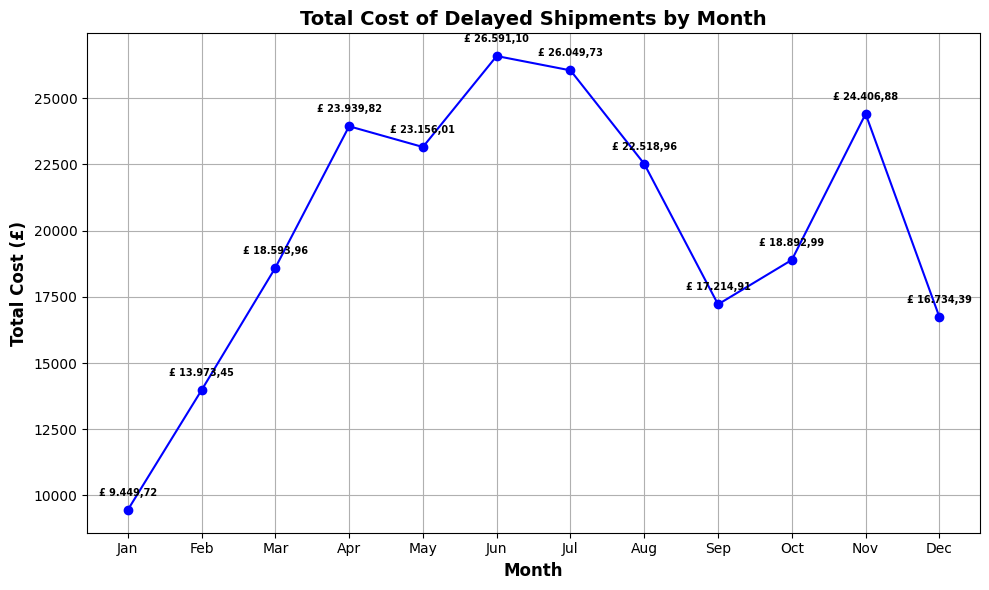

In [4]:
# Function to format currency
def format_currency(value):
    # Split the integer and decimal parts
    integer_part, decimal_part = f"{value:,.2f}".split('.')
    
    # Replace commas with periods and periods with commas in the integer part
    formatted_integer_part = integer_part.replace(',', '.')
    
    # Combine the formatted integer part with the decimal part
    return f"£ {formatted_integer_part},{decimal_part}"

# Convert the 'ETD' column to datetime
AirShipments_DK['ETD'] = pd.to_datetime(AirShipments_DK['ETD'])

# Extract month from 'ETD' column
AirShipments_DK['Month'] = AirShipments_DK['ETD'].dt.strftime('%b')

# Group by month and calculate the total cost of delayed shipments for each month
monthly_delayed_costs = AirShipments_DK.groupby('Month')['Total Amount '].sum()

# Define the order of months
months_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Reindex the monthly_delayed_costs Series to ensure months are in the correct order
monthly_delayed_costs = monthly_delayed_costs.reindex(months_order, fill_value=0)

# Plotting the line chart
plt.figure(figsize=(10, 6))
plt.plot(monthly_delayed_costs.index, monthly_delayed_costs.values, marker='o', color='blue', linestyle='-')

#the values on the dots with formatted currency
for month, cost in zip(monthly_delayed_costs.index, monthly_delayed_costs.values):
    plt.annotate(format_currency(cost), (month, cost), textcoords="offset points", xytext=(0,10), ha='center', fontsize=7, fontweight='bold')

plt.title('Total Cost of Delayed Shipments by Month', fontsize=14, fontweight='bold')
plt.xlabel('Month', fontsize=12, fontweight='bold')
plt.ylabel('Total Cost (£)', fontsize=12, fontweight='bold')
plt.grid(True)
plt.tight_layout()
plt.show()


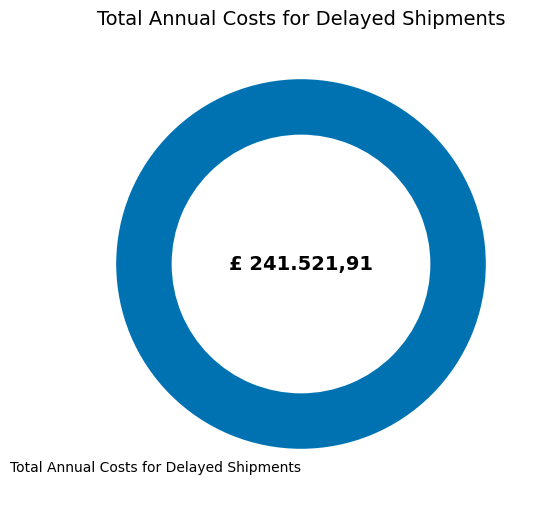

In [5]:

# Total annual costs for delayed shipments
total_annual_costs = 241521.91

# Plotting the donut chart
fig, ax = plt.subplots(figsize=(6, 6))
ax.pie([total_annual_costs], labels=['Total Annual Costs for Delayed Shipments'], startangle=90, colors=['#0072B2'],
       wedgeprops={'width': 0.3})
ax.text(0, 0, format_currency(total_annual_costs), horizontalalignment='center', verticalalignment='center', fontsize=14, fontweight='bold')

plt.title('Total Annual Costs for Delayed Shipments', fontsize=14)
plt.show()


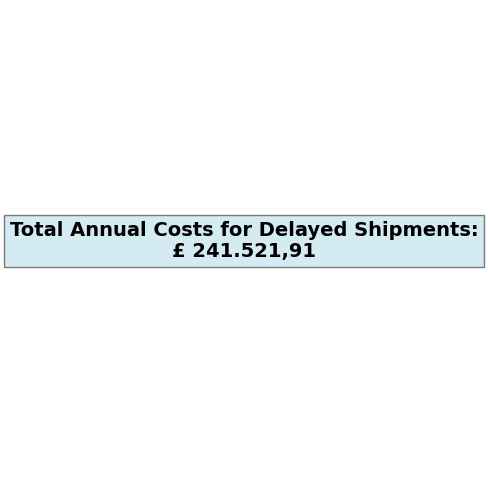

In [6]:

# Total annual costs for delayed shipments
total_annual_costs = 241521.91

# Plotting the highlighted text
plt.figure(figsize=(6, 6))
plt.text(0.5, 0.5, f'Total Annual Costs for Delayed Shipments:\n{format_currency(total_annual_costs)}',
         horizontalalignment='center', verticalalignment='center', fontsize=14, fontweight='bold', bbox=dict(facecolor='lightblue', alpha=0.5))
plt.axis('off')
plt.show()
